In [1]:
import pandas as pd

df=pd.read_csv('d:/data/titanic/train3.csv')
df.head()

,Survived,Pclass,pclass1,plclass2,plcass3,Sex,male,female,Age,SibSp,Parch,Fare
0,0,3,0,0,1,male,1,0,22.0,1,0,7.2500
1,1,1,1,0,0,female,0,1,38.0,1,0,71.2833
2,1,3,0,0,1,female,0,1,26.0,0,0,7.9250
3,1,1,1,0,0,female,0,1,35.0,1,0,53.1000
4,0,3,0,0,1,male,1,0,35.0,0,0,8.0500


In [2]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [3]:
train_cols=df.columns[0:9]
X=df[train_cols] #독립변수
y=df['Survived'] #종속변수

In [4]:
from imblearn.under_sampling import RandomUnderSampler
cols=['pclass1', 'plclass2', 'plcass3','male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare']
X=df[cols]
y=df['Survived']
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [5]:
df2['Survived'].value_counts()

1    342
0    342
Name: Survived, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
from sklearn.tree import DecisionTreeClassifier
#의사결정나무 모형을 만들고 학습용 데이터셋으로 기계학습
model=DecisionTreeClassifier(random_state=0,max_depth=6)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
#예측정확도 확인
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용 

0.8623595505617978
0.8156424581005587


In [9]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #예측한 값
cm=confusion_matrix(y_test,pred) #실제값과 예측값 비교
cm

array([[102,  15],
       [ 18,  44]], dtype=int64)

In [10]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,102,15
1,18,44


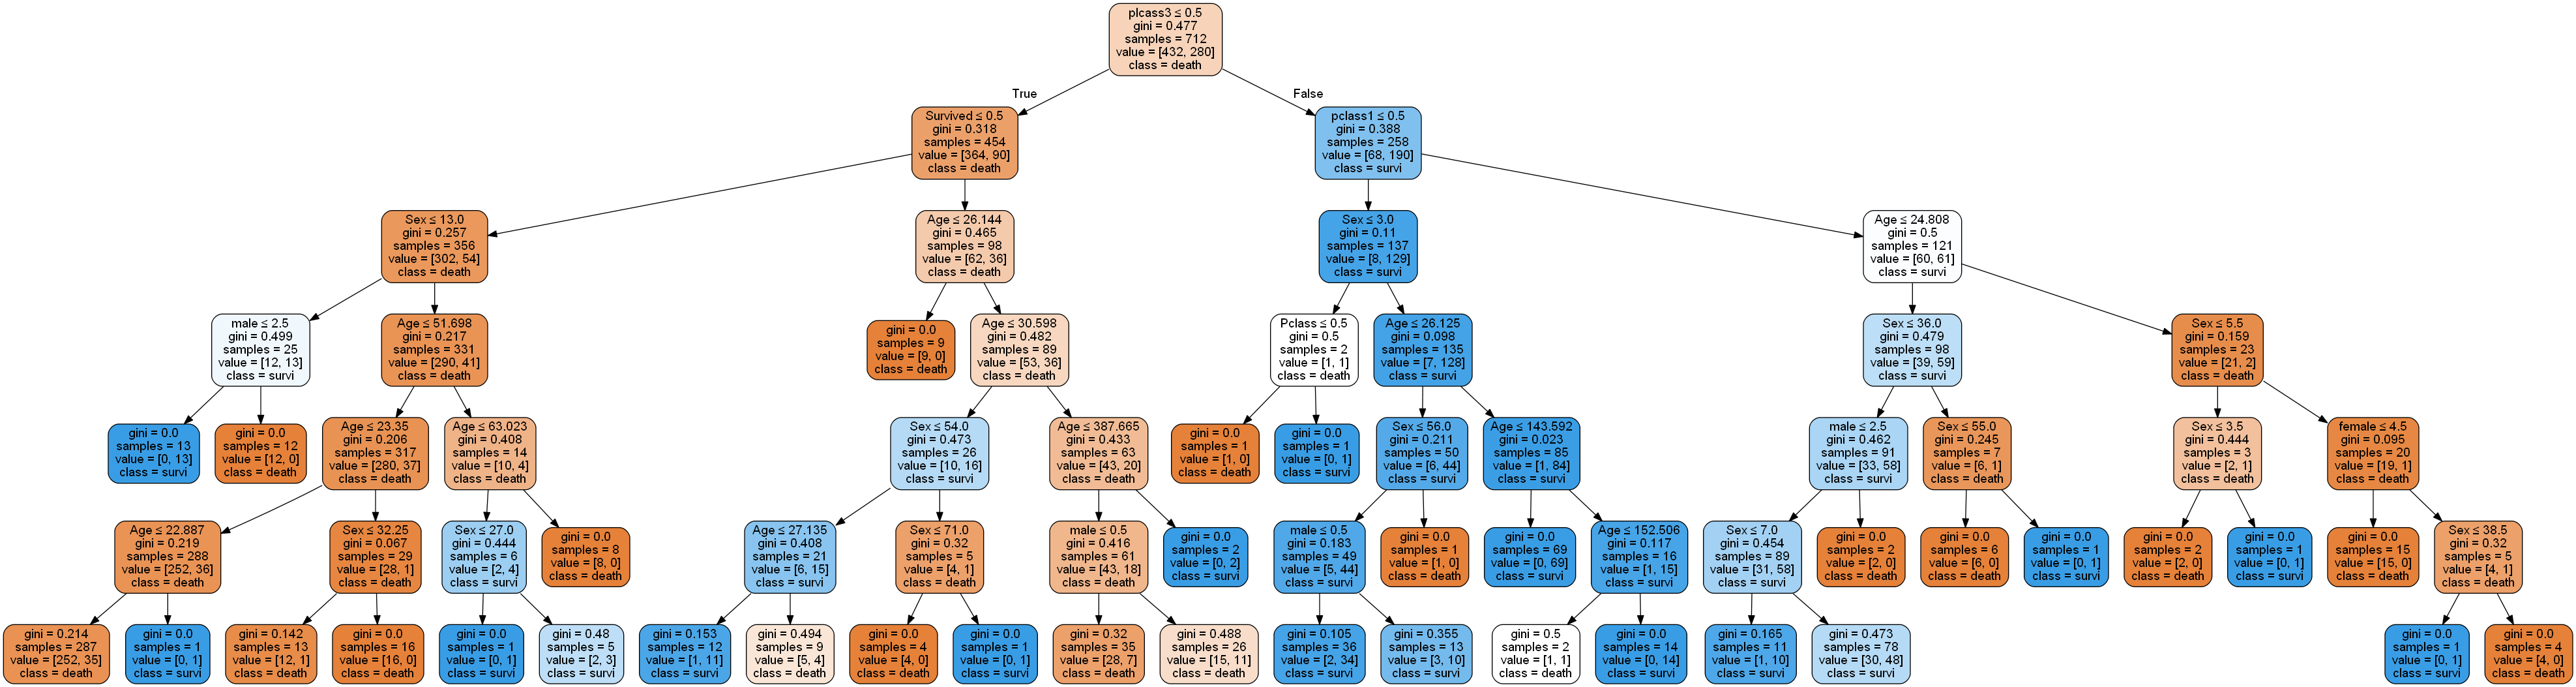

In [11]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
#트리 그래프
dot_data=export_graphviz(model,out_file=None,
                         feature_names=train_cols,class_names=['death','survi'],filled=True,
                         rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

(891, 9)
9
[0.03651481 0.00510826 0.12562999 0.         0.48683324 0.1208798
 0.0828183  0.00153248 0.14068313]


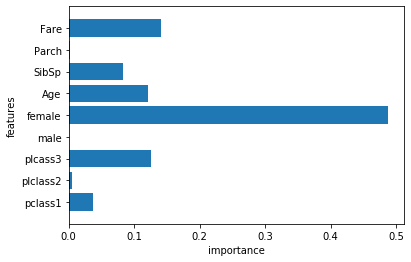

In [12]:
#특성의 중요도 그래프
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#feature_importances_ 변수의 중요도
def plot_tree(model):
    n_features=X.shape[1] #변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features),cols) #y축 눈금
    plt.xlabel('importance') #x축 제목
    plt.ylabel('features') #y축 제목
    plt.ylim(-1,n_features) #y축의 값의 범위
    
plot_tree(model)
#의사결정나무 모형을 만들기 위한 변수의 중요도

print(X.shape)
print(X.shape[1])
print(model.feature_importances_)

In [13]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 모형, 트리갯수 100, 최대질문단계 6
forest=RandomForestClassifier(n_estimators=100,random_state=10,max_depth=6)
forest.fit(X_train,y_train)
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.851123595505618
0.8435754189944135


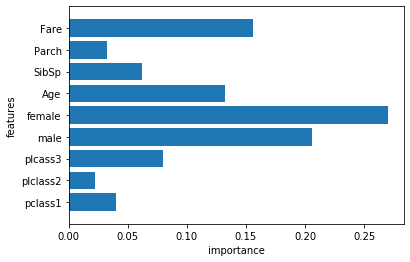

In [14]:
#랜덤포레스트 모형의 특성 중요도 그래프
plot_tree(forest)
#생존에 영향을 미치는 변수 : 요금>나이>성별(여성여부)